In [1]:
import pandas as pd
from math import *
import re
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

    Считаем представленный датасет

In [2]:
train = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')
print(train.shape)
train.head(20)

(159571, 8)


id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13  0006f16e4e9f292e  Before you start throwing accusations and warn...   
14  00070ef96486d6f9  Oh, and the girl above started her arguments w...   
15  00078f8ce7eb276d  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...   
16  0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
17  000897889268bc93   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski   
18  0009801bd85e5806  The Mitsurugi point made no sense - why not ar...   
19  0009eaea3325de8c  Don't mean to bother you \n\nI see that you're...   

    toxic  severe_toxic  obscene  threat  insult  identity_hate  
0       0             0        0       0       0              0  
1       0             0        0       0       0              0  
2       0             0        0       0       0              0  
3       0             0        0       0       0              0  
4       0             0        0       0       0              0  
5       0             0        0       0       0              0  
6       1             1        1       0       1              0  
7       0             0        0       0       0              0  
8       0             0        0       0       0              0  
9       0             0        0       0       0              0  
10      0             0        0       0       0              0  
11      0             0        0       0       0              0  
12      1             0        0       0       0              0  
13      0             0        0       0       0              0  
14      0             0        0       0       0              0  
15      0             0        0       0       0              0  
16      1             0        0       0       0              0  
17      0             0        0       0       0              0  
18      0             0        0       0       0              0  
19      0             0        0       0       0              0

    Попробуем представить коментарии в виде набора чисел. Для этого будем использовать информацию из датасета и введем несколько "индексов" (типо индекс токсичности, индекс оскорбительности и т.д.)  

    Для начала будем составлять что-то вроде словаря для различных типов коментариев

In [3]:
'''
Функция принимает на вход данные, название колонки содержащей коментарии по которой будет строиться словарь,
миниальное число появления слова во всем датасете, чтобы записать слово в словарь (если захочется отсекать 
редкие слова), список слов которые нас не интересуют, и которыетоже не учитываются
'''
def com_to_words(comment):
    return list(filter(None, re.split("[^a-zA-Z']", comment.lower())))
    
def df_to_dict(data_frame, target_column, min_board=0, excess_words=[]):
    dictionary = {}
    for comment in data_frame[target_column]:
        raw_split = com_to_words(comment)

        for word in raw_split:
            if dictionary.get(word):
                dictionary[word] = dictionary[word] + 1
            else:
                dictionary[word] = 1
                
    # Отсортируем по значениям
    list_d = list(dictionary.items())
    list_d.sort(reverse=True, key=lambda i: i[1])
    dictionary = dict(list_d)
    
    print(target_column, ": слов в сыром словаре =", len(dictionary))
    
    # отсечем хвост словаря
    dict_keys = dictionary.keys()
    cutted_dict = {k: dictionary[k] for k in dict_keys 
                         if dictionary[k] > min_board and k not in excess_words}

    print(target_column, ": слов в обрезанном словаре =", len(cutted_dict), '\n')
    
    return cutted_dict

In [4]:
# нейтральные, но при этом частые слова уберем
excess_words = ['the', 'to', 'of', 'a', 'at', 'an', 'and', 'be', 'on',
                'in', 'am', 'is', 'for', 'as', 'are', 's']
#excess_words = []

    Создадим несколько словарей для нескольких типов коментариев:

In [72]:
# словарь по всей выборке
train_dict = df_to_dict(train, 'comment_text', min_board=0, excess_words=excess_words)
print(train_dict)

comment_text : слов в сыром словаре = 185384
comment_text : слов в обрезанном словаре = 185368 

{'you': 206244, 'i': 205114, 'that': 154667, 'it': 130685, 'this': 97635, 'not': 93795, 'have': 72234, 'your': 63373, 'with': 59622, 'if': 58631, 'article': 56094, 'was': 54575, 'or': 53434, 'but': 51104, 'page': 46304, 'wikipedia': 45966, 'my': 45653, 'from': 41522, 'by': 41464, 'do': 40097, 'talk': 37757, 'me': 37426, 'about': 37210, 'so': 36611, 'can': 34161, 'what': 34130, 'there': 32038, 'all': 31604, 'has': 30725, 'will': 30475, 'please': 29791, 'no': 29343, 'would': 29248, 'one': 28861, 'like': 28000, 'just': 27817, 'they': 27362, 'he': 26885, 'which': 25368, 'any': 25138, 'been': 24984, 'should': 23711, 'more': 23454, 'we': 23301, "don't": 22923, 'some': 22591, 'other': 22351, 'who': 21926, 'here': 21632, 'see': 21578, 'also': 20631, 'his': 20464, 'think': 20074, 'because': 19179, 'know': 19113, 'how': 18764, 'edit': 18282, 'people': 17901, "i'm": 17885, 'why': 17831, 'up': 17758, '

In [73]:
# по комментариям, отмеченным как токсичные
train_toxic_dict = df_to_dict(train[train['toxic'] == 1], 'comment_text', min_board=0, excess_words=excess_words)
print(train_toxic_dict)

comment_text : слов в сыром словаре = 33256
comment_text : слов в обрезанном словаре = 33240 

{'you': 36373, 'i': 20863, 'fuck': 9600, 'your': 9136, 'that': 7777, 'it': 6967, 'my': 6183, 'me': 5545, 'this': 5492, 'not': 4836, 'have': 4612, 'do': 4013, 'with': 3932, 'shit': 3620, 'wikipedia': 3600, 'like': 3510, 'all': 3461, 'what': 3377, 'nigger': 3298, 'fucking': 3288, 'suck': 3235, 'so': 3113, 'ass': 2941, 'go': 2865, 'will': 2829, 'u': 2755, 'if': 2630, 'hate': 2630, "don't": 2494, 'just': 2480, 'was': 2410, 'but': 2383, 'up': 2375, 'no': 2351, 'who': 2317, 'or': 2317, 'get': 2300, 'about': 2276, 'can': 2252, 'gay': 2236, 'know': 2196, 'page': 2144, "you're": 2109, 'die': 2082, 'he': 2060, 'faggot': 2016, 'off': 2006, 'fat': 1970, 'because': 1966, 'yourself': 1947, 'by': 1947, 'from': 1904, 'moron': 1861, 'people': 1804, 'bitch': 1786, 'why': 1761, 'hi': 1691, 'they': 1673, 'cunt': 1541, 'one': 1518, "i'm": 1500, 'talk': 1497, 'sucks': 1443, 'stupid': 1436, 'wiki': 1425, 'stop': 14

In [74]:
train_severe_toxic_dict = df_to_dict(train[train['severe_toxic'] == 1], 'comment_text', min_board=0, excess_words=excess_words)
print(train_severe_toxic_dict)

comment_text : слов в сыром словаре = 6076
comment_text : слов в обрезанном словаре = 6060 

{'you': 10033, 'fuck': 6985, 'i': 3520, 'suck': 2535, 'ass': 2115, 'your': 2056, 'shit': 1884, 'faggot': 1570, 'u': 1482, 'fucking': 1456, 'my': 1305, 'go': 1241, 'yourself': 1239, 'die': 1156, 'bitch': 1113, 'nigger': 1012, 'me': 987, 'sucks': 961, 'cunt': 834, 'wikipedia': 768, 'off': 715, 'this': 695, 'cock': 681, "you're": 677, 'will': 653, 'up': 632, 'fucksex': 624, 'yourselfgo': 621, 'dick': 596, 'fucker': 588, 'kill': 580, 'all': 574, 'it': 561, 'asshole': 522, 'cocksucker': 510, 'd': 504, 'piece': 502, 'penis': 490, 'mothjer': 489, 'bastard': 481, 'gay': 477, 'eat': 431, 'bitches': 430, 'huge': 424, 'shut': 407, 'fat': 406, 'damn': 398, 'that': 384, 'rape': 383, 'dog': 376, 'stupid': 369, 'offfuck': 360, 'mexicans': 358, 'anal': 350, 'pro': 349, 'hanibal': 348, 'assad': 347, 'like': 341, 'niggas': 337, 'dickhead': 337, 'can': 336, 'with': 334, 'pussy': 332, 'get': 327, 'idiot': 320, 'bl

In [75]:
train_obscene_dict = df_to_dict(train[train['obscene'] == 1], 'comment_text', min_board=0, excess_words=excess_words)
print(train_obscene_dict)

comment_text : слов в сыром словаре = 21762
comment_text : слов в обрезанном словаре = 21746 

{'you': 22256, 'i': 10769, 'fuck': 9520, 'your': 5422, 'that': 3697, 'my': 3667, 'it': 3597, 'shit': 3211, 'fucking': 3190, 'suck': 3021, 'this': 2966, 'me': 2871, 'ass': 2848, 'nigger': 2726, 'have': 2231, 'u': 2198, 'go': 2147, 'not': 2116, 'with': 2026, 'do': 1944, 'all': 1878, 'wikipedia': 1876, 'what': 1842, 'bitch': 1796, 'off': 1677, 'so': 1662, 'up': 1564, 'like': 1541, 'cunt': 1530, 'yourself': 1454, 'will': 1415, 'get': 1407, "you're": 1397, "don't": 1353, 'if': 1338, 'can': 1295, 'fat': 1282, 'no': 1270, 'dick': 1257, 'faggot': 1222, 'just': 1215, 'was': 1202, 'know': 1175, 'die': 1173, 'about': 1143, 'who': 1112, 'or': 1111, 'but': 1104, 'bullshit': 1085, 'page': 1080, 'penis': 1075, 'sucks': 1068, 'asshole': 1008, 'because': 1000, 'he': 978, 'stupid': 952, 'cock': 923, 'from': 922, 'hate': 835, 'by': 826, 'nipple': 824, 'why': 810, "i'm": 804, 'people': 791, 'talk': 776, 'user': 

In [76]:
train_threat_dict = df_to_dict(train[train['threat'] == 1], 'comment_text', min_board=0, excess_words=excess_words)
print(train_threat_dict)

comment_text : слов в сыром словаре = 3024
comment_text : слов в обрезанном словаре = 3008 

{'you': 1970, 'i': 1957, 'die': 1168, 'will': 840, 'ass': 772, 'your': 506, 'kill': 504, 'going': 294, 'if': 269, 'it': 219, 'wikipedia': 198, 'yourself': 194, 'block': 170, 'must': 167, 'fuck': 165, 'jim': 158, 'wales': 157, 'll': 156, 'supertr': 152, 'that': 145, 'fucking': 138, 'ban': 132, "don't": 130, 'me': 129, 'page': 129, 'my': 128, 'talk': 113, 'murder': 107, 'live': 102, 'fuckin': 100, 'this': 96, 'rvv': 96, "i'm": 94, 'blank': 94, 'di': 92, 'edie': 90, 'lifetime': 87, 'again': 86, 'out': 85, 'have': 82, 'go': 82, 'pathetic': 81, 'forever': 80, 'real': 80, 'wiki': 79, 'over': 79, 'do': 78, 'with': 78, 'fool': 78, 'respect': 76, 'all': 74, 'en': 73, 'org': 71, 'stephen': 71, 'shit': 70, 'get': 69, 'hawkinghttp': 69, 'bitch': 68, 'so': 68, 'u': 67, 'hope': 65, 'take': 65, 'off': 62, 'or': 61, 'not': 61, 'up': 59, 'what': 54, 'like': 53, 'who': 53, 'dust': 53, 'filter': 53, 'steal': 52, 

In [77]:
train_insult_dict = df_to_dict(train[train['insult'] == 1], 'comment_text', min_board=0, excess_words=excess_words)
print(train_insult_dict)

comment_text : слов в сыром словаре = 20369
comment_text : слов в обрезанном словаре = 20353 

{'you': 22567, 'i': 9439, 'fuck': 7600, 'your': 5514, 'that': 3250, 'my': 3212, 'it': 3004, 'fucking': 2799, 'suck': 2792, 'nigger': 2780, 'this': 2521, 'me': 2462, 'go': 2235, 'ass': 2213, 'u': 2097, 'fat': 1926, 'not': 1896, 'do': 1889, 'have': 1868, 'faggot': 1866, 'with': 1781, 'bitch': 1735, 'shit': 1690, 'all': 1635, 'what': 1621, 'like': 1565, "you're": 1474, 'so': 1474, 'will': 1459, 'moron': 1458, 'cunt': 1441, 'off': 1432, 'hi': 1400, 'wikipedia': 1398, 'hate': 1386, 'yourself': 1326, 'jew': 1306, 'get': 1301, "don't": 1248, 'if': 1217, 'die': 1217, 'know': 1160, 'up': 1134, 'just': 1085, 'who': 1073, 'stupid': 1068, 'dick': 1046, 'can': 1035, 'no': 1023, 'because': 1003, 'was': 979, 'about': 969, 'asshole': 956, 'sucks': 954, 'or': 949, 'page': 921, 'but': 913, 'he': 845, 'from': 832, 'gay': 816, 'idiot': 809, 'people': 787, 'by': 761, 'why': 722, 'piece': 712, 'dickhead': 709, 'wa

In [78]:
train_identity_hate_dict = df_to_dict(train[train['identity_hate'] == 1], 'comment_text', min_board=0, excess_words=excess_words)
print(train_identity_hate_dict)

comment_text : слов в сыром словаре = 7438
comment_text : слов в обрезанном словаре = 7422 

{'nigger': 2968, 'you': 2753, 'i': 1609, 'fat': 1322, 'jew': 1313, 'gay': 917, 'die': 879, 'fuck': 878, 'faggot': 742, 'your': 615, 'that': 566, 'fucking': 518, 'it': 489, 'me': 465, 'huge': 430, 'suck': 427, 'shit': 410, 'stupid': 396, 'cunt': 394, 'like': 384, 'ass': 374, 'mexicans': 365, 'bitch': 349, 'this': 343, 'my': 342, 'off': 342, 'niggas': 342, 'with': 327, 'have': 323, 'go': 308, 'hate': 291, 'not': 284, 'bunksteve': 278, 'u': 275, 'do': 250, 'jewish': 248, 'get': 246, 'so': 243, 'if': 234, 'wikipedia': 231, 'tommy': 230, 'all': 228, 'he': 226, 'yourself': 216, 'who': 214, 'what': 209, 'ancestryfuck': 208, 'down': 203, 'kill': 197, 'they': 192, 'or': 191, 'just': 188, 'jews': 182, 'spanish': 182, 'licker': 181, 'fan': 181, "can't": 180, 'centraliststupid': 179, 'people': 176, 'will': 171, 'piece': 171, "you're": 170, 'nigga': 170, 'was': 169, 'about': 167, 'keep': 167, 'but': 166, 'c

    Проанализировав словари видно, что они различимы. Есть характерные слова, которые чаще встречаются в тех или иных типах комментариев. 

    Теперь нужно как-то выделить эти различия и построить медод построения наших индексов по комментарию
    
    Постараемся выделить из словарей слова присущие именно конкретному типу комментариев

In [52]:
def dict_processing(train, train_toxic):
    num_train = 0
    num_toxic = 0
    for v in train.values(): num_train = num_train + v
    for v in train_toxic.values(): num_toxic = num_toxic + v
    
    train_frec = {k: train[k] / num_train for k in train.keys()}
    train_toxic_frec = {k: train_toxic[k] / num_toxic for k in train_toxic.keys()}
    
    # вычтем частоты по train из train_toxic:
    for k in train_frec.keys():
        if train_toxic_frec.get(k):
            if train_toxic_frec[k] > 2 * train_frec[k]:
                train_toxic_frec[k] = train_toxic_frec[k] - train_frec[k]
            else:
                train_toxic_frec[k] = train_toxic_frec[k] - train_frec[k]
                #del train_toxic_frec[k]
         
    # Отсортируем по значениям
    list_d = list(train_toxic_frec.items())
    list_d.sort(reverse=True, key=lambda i: i[1])
    train_toxic_frec = dict(list_d)
    
    return train_toxic_frec

In [79]:
train_toxic_weights = dict_processing(train_dict, train_toxic_dict)
train_severe_toxic_weights = dict_processing(train_dict, train_severe_toxic_dict)
train_obscene_weights = dict_processing(train_dict, train_obscene_dict)
train_threat_weights = dict_processing(train_dict, train_threat_dict)
train_insult_weights = dict_processing(train_dict, train_insult_dict)
train_identity_hate_weights = dict_processing(train_dict, train_identity_hate_dict)

In [80]:
print(len(train_toxic_weights), len(train_toxic_dict))
print(len(train_severe_toxic_weights), len(train_severe_toxic_dict))
print(len(train_obscene_weights), len(train_obscene_dict))
print(len(train_threat_weights), len(train_threat_dict))
print(len(train_insult_weights), len(train_insult_dict))
print(len(train_identity_hate_weights), len(train_identity_hate_dict))

33240 33240
6060 6060
21746 21746
3008 3008
20353 20353
7422 7422


In [81]:
# Посмотрим, на что это похоже
print(train_identity_hate_weights)

{'nigger': 0.04688935736008963, 'fat': 0.020807466299949978, 'jew': 0.02072374014940034, 'you': 0.01924984010596661, 'gay': 0.014275032998273506, 'die': 0.01370728425448549, 'fuck': 0.012826573968265557, 'faggot': 0.011579333663237077, 'fucking': 0.007847388543642015, 'huge': 0.006700665487840583, 'suck': 0.006408565742537715, 'cunt': 0.0060875666585720346, 'shit': 0.0060689582316431874, 'stupid': 0.006064295480001819, 'mexicans': 0.0057675247036837905, 'ass': 0.005584275098782747, 'niggas': 0.0054079829555455485, 'bitch': 0.005337752302169086, 'off': 0.004730458877005744, 'bunksteve': 0.004396253788716148, 'hate': 0.004218377094274604, 'jewish': 0.00377170134524584, 'u': 0.003726187026197223, 'go': 0.0036724414199013236, 'tommy': 0.003630266350667902, 'ancestryfuck': 0.003289283410262442, 'kill': 0.0030037429332405528, 'me': 0.0029423191756468674, 'licker': 0.0028611156670027135, 'centraliststupid': 0.002830681396331621, 'spanish': 0.0027993549917590503, 'like': 0.0027766794717282877,

 весьма забавно
 
 ### ***  
 Допустим, к этому моменту все словари есть. Теперь надо придумать, как с их помощью преобразовать комментарий в вектор

In [56]:
# введем следующие метрики и будем отображать комментарии на соответствующее пространство
# понятно, что некоторые признаки будут сильно скорелированны
indexes = ['lenght_of_comment', 'part_of_capital', 'number_of_exclamation_mark', 'toxic_index', 'severe_toxic_index', 'obscene_index', 'threat_index', 'insult_index', 'identity_hate_index']

In [57]:
def lenght_of_comment(comment):
    return len(com_to_words(comment))

def part_of_capital(comment):
    up = 0
    al = 0
    for i in range(len(comment)):
        if comment[i].isalpha():
            if comment[i].isupper():
                up+=1
            al+=1
    return up/al if al!=0 else 0.

def number_of_exclamation_mark(comment):
    res = 0
    for i in range(len(comment)):
        if comment[i] == '!':
            res+=1
    return res

In [58]:
#  остальные индексы вычисляются примерно одинаково по разным словарям
#  то, как мы вычисляем индексы сильно сказывается на качестве предсказаний
def some_index(comment, weights):
    index = 0
    num_of_words = 0
    words = com_to_words(comment)
    for word in words:
        if weights.get(word):
            num_of_words = num_of_words + 1
            if weights[word] >= 0:
                index = index + sqrt(weights[word])
            else:
                index = index - sqrt(-weights[word])
    return index

In [59]:
def toxic_index(comment):
    return some_index(comment, train_toxic_weights)

def severe_toxic_index(comment):
    return some_index(comment, train_severe_toxic_weights)

def obscene_index(comment):
    return some_index(comment, train_obscene_weights)

def threat_index(comment):
    return some_index(comment, train_threat_weights)

def insult_index(comment):
    return some_index(comment, train_insult_weights)

def identity_hate_index(comment):
    return some_index(comment, train_identity_hate_weights)

    Теперь будем формировать трейновую выборку

In [82]:
train_shuffled = shuffle(train, random_state=1)

train_shuffled['lenght_of_comment'] = train_shuffled['comment_text'].apply(lenght_of_comment)
train_shuffled['part_of_capital'] = train_shuffled['comment_text'].apply(part_of_capital)
train_shuffled['number_of_exclamation_mark'] = train_shuffled['comment_text'].apply(number_of_exclamation_mark)

train_shuffled['toxic_index'] = train_shuffled['comment_text'].apply(toxic_index)
train_shuffled['severe_toxic_index'] = train_shuffled['comment_text'].apply(severe_toxic_index)
train_shuffled['obscene_index'] = train_shuffled['comment_text'].apply(obscene_index)
train_shuffled['threat_index'] = train_shuffled['comment_text'].apply(threat_index)
train_shuffled['insult_index'] = train_shuffled['comment_text'].apply(insult_index)
train_shuffled['identity_hate_index'] = train_shuffled['comment_text'].apply(identity_hate_index)

/home/dmitriy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dmitriy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/dmitriy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [83]:
copy_without_str = train_shuffled.drop(['id', 'comment_text'], axis=1)
copy_without_str.head(5)

toxic  severe_toxic  obscene  threat  insult  identity_hate  \
24915       1             1        1       0       1              0   
75819       0             0        0       0       0              0   
53891       0             0        0       0       0              0   
154159      0             0        0       0       0              0   
13040       0             0        0       0       0              0   

        lenght_of_comment  part_of_capital  number_of_exclamation_mark  \
24915                  25         1.000000                           0   
75819                 766         0.034104                           1   
53891                  48         0.042553                           0   
154159                 30         0.053892                           0   
13040                   9         0.057143                           0   

        toxic_index  severe_toxic_index  obscene_index  threat_index  \
24915      0.567951            0.540549       0.542135      0.757836   
75819     -5.377579          -10.436810      -6.460725     -5.991731   
53891      0.162369           -0.325730       0.038234      0.036726   
154159    -0.366310           -0.579911      -0.394445     -0.396272   
13040      0.104068            0.017921       0.097284      0.187485   

        insult_index  identity_hate_index  
24915       0.599181             0.333475  
75819      -6.797422            -9.847624  
53891      -0.045379            -0.272214  
154159     -0.406252            -0.548354  
13040       0.113906            -0.084409

In [84]:
copy_without_str[copy_without_str.columns[:]].corr()

toxic  severe_toxic   obscene    threat  \
toxic                       1.000000      0.308619  0.676515  0.157058   
severe_toxic                0.308619      1.000000  0.403014  0.123601   
obscene                     0.676515      0.403014  1.000000  0.141179   
threat                      0.157058      0.123601  0.141179  1.000000   
insult                      0.647518      0.375807  0.741272  0.150022   
identity_hate               0.266009      0.201600  0.286867  0.115128   
lenght_of_comment          -0.050178      0.011781 -0.039541 -0.005642   
part_of_capital             0.220572      0.168633  0.182685  0.056149   
number_of_exclamation_mark  0.037337      0.060578  0.024362  0.034202   
toxic_index                 0.187327      0.191207  0.163328  0.057223   
severe_toxic_index          0.166155      0.212732  0.160073  0.055631   
obscene_index               0.181358      0.201545  0.171460  0.055068   
threat_index                0.136943      0.158692  0.122399  0.097661   
insult_index                0.179765      0.194437  0.163965  0.054104   
identity_hate_index         0.169255      0.169894  0.153472  0.048493   

                              insult  identity_hate  lenght_of_comment  \
toxic                       0.647518       0.266009          -0.050178   
severe_toxic                0.375807       0.201600           0.011781   
obscene                     0.741272       0.286867          -0.039541   
threat                      0.150022       0.115128          -0.005642   
insult                      1.000000       0.337736          -0.041099   
identity_hate               0.337736       1.000000          -0.013165   
lenght_of_comment          -0.041099      -0.013165           1.000000   
part_of_capital             0.169207       0.089158          -0.068871   
number_of_exclamation_mark  0.027010       0.006005           0.040438   
toxic_index                 0.163593       0.069034          -0.078226   
severe_toxic_index          0.157370       0.064915          -0.189619   
obscene_index               0.166107       0.069366          -0.129605   
threat_index                0.122322       0.046101          -0.030816   
insult_index                0.169539       0.071651          -0.128093   
identity_hate_index         0.157889       0.106628          -0.337457   

                            part_of_capital  number_of_exclamation_mark  \
toxic                              0.220572                    0.037337   
severe_toxic                       0.168633                    0.060578   
obscene                            0.182685                    0.024362   
threat                             0.056149                    0.034202   
insult                             0.169207                    0.027010   
identity_hate                      0.089158                    0.006005   
lenght_of_comment                 -0.068871                    0.040438   
part_of_capital                    1.000000                    0.063174   
number_of_exclamation_mark         0.063174                    1.000000   
toxic_index                        0.150307                    0.096308   
severe_toxic_index                 0.149024                    0.100773   
obscene_index                      0.149772                    0.090615   
threat_index                       0.115996                    0.088743   
insult_index                       0.146947                    0.092346   
identity_hate_index                0.163383                    0.060163   

                            toxic_index  severe_toxic_index  obscene_index  \
toxic                          0.187327            0.166155       0.181358   
severe_toxic                   0.191207            0.212732       0.201545   
obscene                        0.163328            0.160073       0.171460   
threat                         0.057223            0.055631       0.055068   
insult                         0.163593            0.157370       0.16

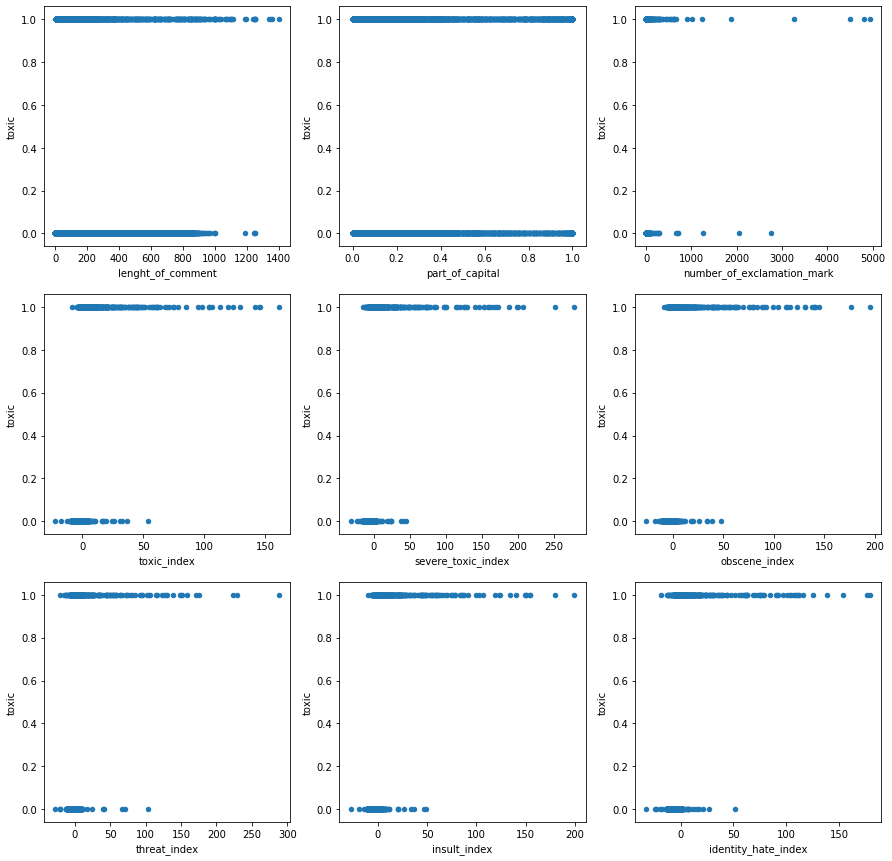

In [85]:
# посмотрим как это выглядит, например, для токсичных комментариев
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for idx, feature in enumerate(copy_without_str.columns[6:15]):    
    copy_without_str.plot(feature, "toxic", subplots=True, kind="scatter", ax=axes[int(idx / 3), idx % 3])

### Видно, что индексы о чем-то говорят, но пока не понятно достаточно ли они информативны

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import *
import sklearn.metrics as mtrcs

In [87]:
X = scale(copy_without_str[indexes])
y = copy_without_str['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [88]:
%%time
log_classifier = LogisticRegression(max_iter = 10000)
log_classifier.fit(X_train, y_train)

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.68 s, sys: 28.1 ms, total: 1.71 s
Wall time: 1.19 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
mtrcs.roc_auc_score(y_test, log_classifier.predict_proba(X_test)[:,1])

0.8791834003135431

    Избавимся от несбалансированности в данных

In [90]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [92]:
%%time
log_classifier2 = LogisticRegression(max_iter = 10000)
log_classifier2.fit(X_resampled, y_resampled)

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 1.69 s, sys: 7.97 ms, total: 1.7 s
Wall time: 1.53 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
mtrcs.roc_auc_score(y_test, log_classifier2.predict_proba(X_test)[:,1])

0.8859112125687657

    
    неплохо для такой простой модели
    
    Займемся подбором параметров модели

In [97]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

In [95]:
log_classifier2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [107]:
parameters_grid = {
    'C' : [(k + 1)**2 * 0.1 for k in range(11)],
    'penalty' : ['l1', 'l2'],
}

In [108]:
log_classifier3 = LogisticRegression()
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 0)

In [109]:
grid_cv = GridSearchCV(log_classifier3, parameters_grid, scoring = 'roc_auc', cv=cv)

In [110]:
%%time
grid_cv.fit(X_train, y_train)

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lb

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lb

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

CPU times: user 13min 8s, sys: 9.96 s, total: 13min 18s
Wall time: 11min 4s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 0.9, 1.6, 2.5, 3.6, 4.9, 6.4, 8.1,
                               10.0, 12.100000000000001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, r

In [114]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8821003244972448
{'C': 6.4, 'penalty': 'l1'}


In [111]:
log_classifier4 = LogisticRegression()
grid_cv_oversampled = GridSearchCV(log_classifier4, parameters_grid, scoring = 'roc_auc', cv=cv)

In [113]:
%%time
grid_cv_oversampled.fit(X_resampled, y_resampled)

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dmitriy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

CPU times: user 20min 19s, sys: 10.1 s, total: 20min 29s
Wall time: 18min 15s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.4, 0.9, 1.6, 2.5, 3.6, 4.9, 6.4, 8.1,
                               10.0, 12.100000000000001],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, r

In [116]:
print(grid_cv_oversampled.best_score_)
print(grid_cv_oversampled.best_params_)

0.8852026734679166
{'C': 12.100000000000001, 'penalty': 'l2'}
